In [1]:
import pycountry
import os
import glob
import liegecolloquium
import logging
import re
from mpl_toolkits.basemap import Basemap

In [2]:
logger = logging.getLogger("participant-map")
logger.setLevel(logging.DEBUG)

In [3]:
countryshapefile = "/home/ctroupin/Data/ShapeFiles/TM_WORLD_BORDERS_SIMPL-0.3/TM_WORLD_BORDERS_SIMPL-03.shp"
datadir = "../data/"
figdir = "../figures/participants/test/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "ParticipantList-1972*.tsv")))
if not os.path.exists(figdir):
    os.makedirs(figdir)

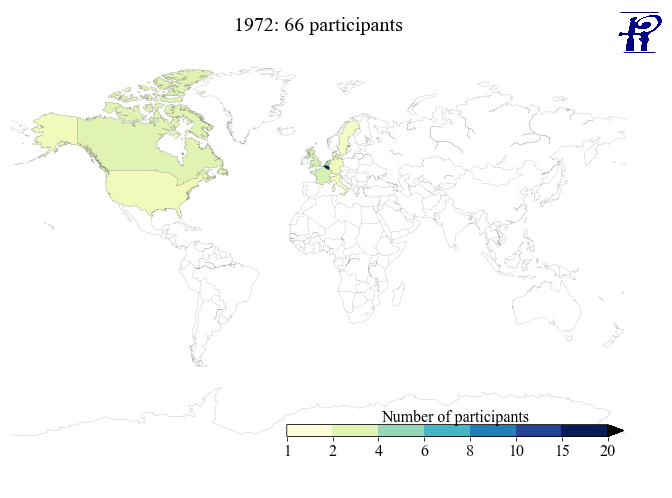

In [6]:
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Test with orthographic projection: not very successful!
# m = Basemap(projection='ortho',lon_0=-15,lat_0=25,resolution='l')

for datafile in datafilelist:
    logger.info("Working on file {}".format(datafile))
    
    # Get year from filename
    match = re.search(r'ParticipantList-(\d{4}).tsv', datafile)
    year = match.group(1)
    
    # Build fig name
    figname = os.path.join(figdir, "participant-map-{0}.png".format(year))

    # Get the list of iso-codes
    country_iso_list = liegecolloquium.countries_from_particitant_list(datafile)
    
    # Make a nice map out of it
    liegecolloquium.make_country_map(country_iso_list, countryshapefile, m, figname, year=year,
                                     bounds=(1, 2, 4, 6, 8, 10, 15, 20),
                                     logofile="../logos/logo_colloquium.png")